In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [42]:
#Import data
teaching_data = pd.read_excel('Data Science Teaching Method.xlsx')
teaching_data.head()


,Prior_Knowledge,Teaching_Method,Score
0,Low,Direct,77.99
1,Low,Direct,76.89
2,Low,Direct,71.19
3,Low,Direct,81.23
4,Low,Direct,73.97


In [43]:
##Calculate Means and standard deviations by teaching methods
sum_stats = teaching_data.groupby('Teaching_Method')['Score'].agg(['mean', 'std'])
print(sum_stats)

                    mean       std
Teaching_Method                   
Collaborative    87.1000  7.414661
Direct           77.4915  7.264446
Inquiry          82.1145  7.037525


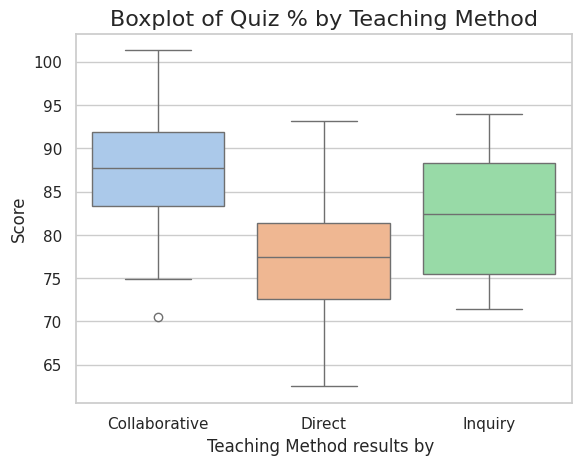

In [49]:
teaching_strategies = ["Collaborative", "Direct", "Inquiry"]

teaching_data['Teaching_Method'] = pd.Categorical(teaching_data['Teaching_Method'],
                                          categories=teaching_strategies,
                                          ordered=True)
#Create a Boxplot
sns.set(style="whitegrid")
sns.boxplot(data=teaching_data, x='Teaching_Method', y='Score', hue='Teaching_Method', hue_order=teaching_strategies, palette='pastel')
plt.xlabel('Teaching Method results by ')
plt.ylabel('Score')
plt.title('Boxplot of Quiz % by Teaching Method', loc='center', fontsize=16)
plt.show()

In [57]:
#Anova Model
teaching_data.rename(columns={'Score': 'Quiz_Score', 'Teaching_Method': 'Teaching_Methods'}, inplace=True)
ts_mod = ols('Quiz_Score ~ C(Teaching_Methods)', data=teaching_data).fit()
#obtain Anova table
ts_tab = sm.stats.anova_lm(ts_mod, typ=3)
ts_tab["Prior_Knowledge"] = np.where(ts_tab["PR(>F)"] < 0.05, "Low", "High")
print(ts_tab.loc[:, ["PR(>F)", "Prior_Knowledge"]])




                           PR(>F) Prior_Knowledge
Intercept            1.491990e-50             Low
C(Teaching_Methods)  4.637272e-04             Low
Residual                      NaN            High


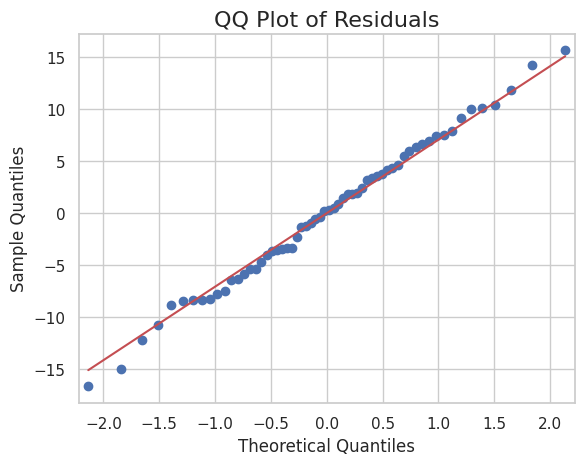

In [60]:
#Assessing Normaility
#Import scipy
import scipy.stats as stats
ts_residuals = ts_mod.resid
##Generate QQ PLOT
smqqplot = sm.qqplot(ts_residuals, line='s')
plt.title('QQ Plot of Residuals', loc='center', fontsize=16)
plt.show()

In [62]:
##Perform Shapiro-Wilk Test
shapiro_test = stats.shapiro(ts_residuals)
shapiro_stat = shapiro_test.statistic
shapiro_pval = shapiro_test.pvalue
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_pval:.4f}")
if shapiro_pval < 0.05:
    print("The residuals are not normally distributed (reject H0).")
else:
    print("The residuals are normally distributed (fail to reject H0).")

Shapiro-Wilk Test Statistic: 0.9926
Shapiro-Wilk p-value: 0.9759
The residuals are normally distributed (fail to reject H0).


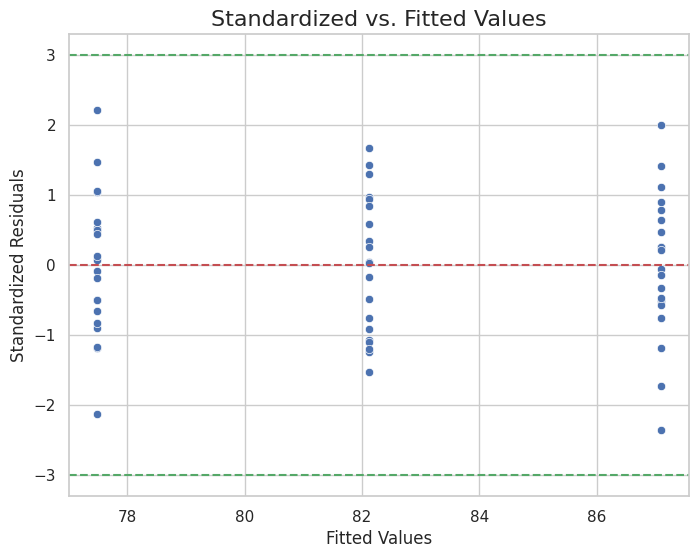

In [63]:
#Constant Variance check
##Obtain Standardized Residuals
standardized_residuals = ts_mod.get_influence().resid_studentized_internal
fitted_values = ts_mod.fittedvalues
#Create Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='g', linestyle='--')
plt.axhline(y=-3, color='g', linestyle='--')
plt.title('Standardized vs. Fitted Values', fontsize=16)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

In [91]:
print(ts_tab.columns.tolist())
print(ts_tab.loc["C(Teaching_Methods)", ["F", "PR(>F)"]])


['sum_sq', 'df', 'F', 'PR(>F)', 'Prior_Knowledge']
F         8.809386
PR(>F)    0.000464
Name: C(Teaching_Methods), dtype: object


Figure(1000x600)
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -9.6085 0.0003 -15.1184 -4.0986   True
Collaborative Inquiry  -4.9855 0.0838 -10.4954  0.5244  False
       Direct Inquiry    4.623 0.1168  -0.8869 10.1329  False
-------------------------------------------------------------


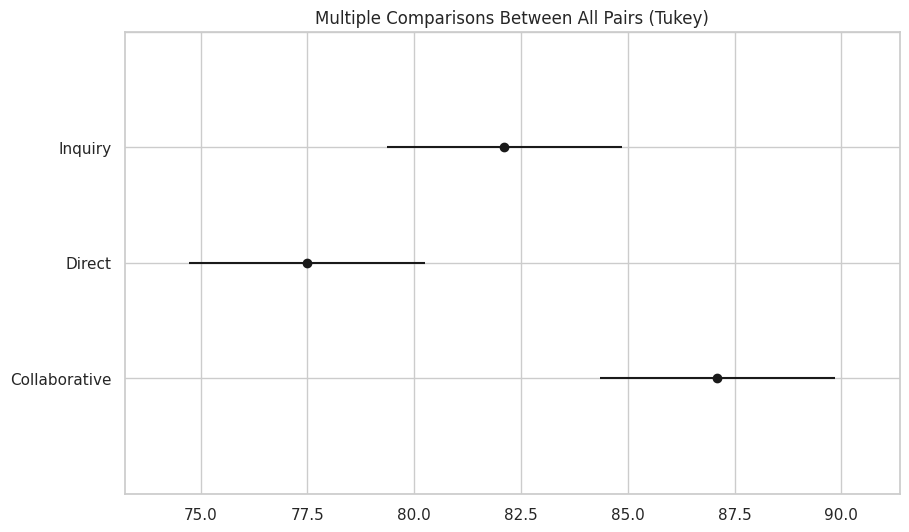

In [92]:
##Import pairwisw_tukeyhsd function
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(teaching_data['Quiz_Score'], teaching_data['Teaching_Methods'], alpha=0.05)
print(tukey_results.plot_simultaneous())
print(tukey_results)

In [96]:
####PART 2 Latin Square Design


## Import Necessary Packages ##
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ol_learning = pd.read_excel('Online Learning and Engagement.xlsx')
print(ol_learning.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         16 non-null     object 
 1   Section     16 non-null     object 
 2   Platform    16 non-null     object 
 3   Engagement  16 non-null     float64
dtypes: float64(1), object(3)
memory usage: 644.0+ bytes
None


In [97]:
sum_stats = ol_learning.groupby('Section')['Engagement'].agg(['mean', 'std'])
print(sum_stats)

                      mean        std
Section                              
Early Afternoon  1382.5250  16.058262
Evening          1349.9975  46.408685
Mid Afternoon    1358.1850  66.576369
Morning          1369.5250  22.100471


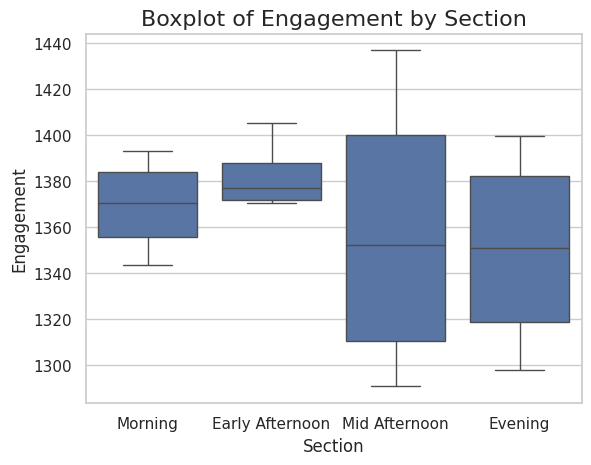

In [98]:
###Build a Box Plot
sns.set(style="whitegrid")
sns.boxplot(data=ol_learning, x='Section', y='Engagement')
plt.title('Boxplot of Engagement by Section', loc='center', fontsize=16)
plt.show()


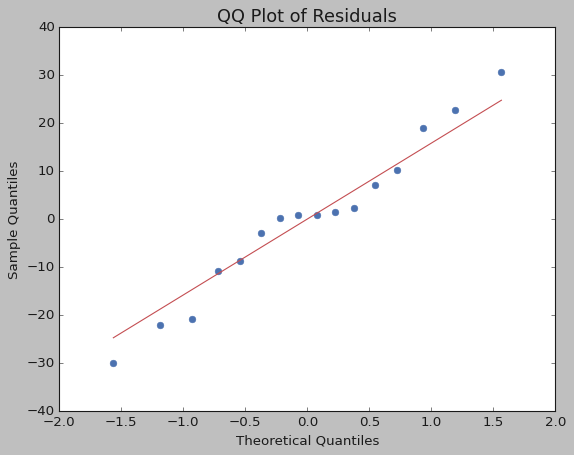

Shapiro-Wilk Test Statistic: 0.9727, p-value: 0.8797
The residuals do not appear to be normally distributed (reject H0).


In [108]:
##FIT ANOVA Model ###
lsd_mod = ols('Engagement ~ C(Section) + C(Day) + C(Platform)', data=ol_learning).fit()
##Extract Residuals
residuals = lsd_mod.resid
## PLot QQ Plot with Seaborn
smqqplot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals', loc='center', fontsize=16)
plt.show()
##S-W TEST
sw = stats.shapiro(residuals)
###Extract Test stat & P Value
sw_stat = sw.statistic
sw_pval = sw.pvalue
print(f"Shapiro-Wilk Test Statistic: {sw_stat:.4f}, p-value: {sw_pval:.4f}")
if sw_pval < 0.05:
    print("The residuals appear to be normally distributed ( fail to reject H0).")
else:
   print("The residuals do not appear to be normally distributed (reject H0).")


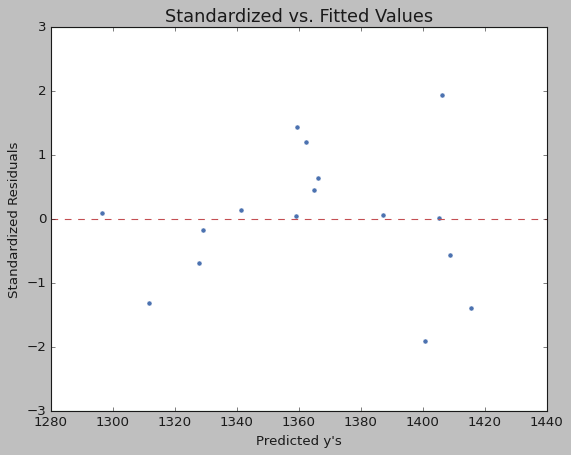

F-statistic: 1.0496262780133725
F p-value: 0.4951336302652182
The Residuals do not appear to have constant variance(reject H0).


In [109]:
##Assessing Constant Variance
##Obtaining Standardized Residuals
standardized_residuals = lsd_mod.get_influence().resid_studentized_internal
fitted_values = lsd_mod.fittedvalues
##Create the Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='g')
plt.axhline(y=-3, color='g')
plt.xlabel("Predicted y's")
plt.ylabel('Standardized Residuals')
plt.title('Standardized vs. Fitted Values', fontsize=16)
plt.style.use('classic')
plt.show()

###BP TEST###

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, lsd_mod.model.exog)
##Extract F-Statistic##
f_statistic = bp_test[2]
##Extract P Value
f_p_value = bp_test[3]
print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")
if f_p_value < 0.05:
  print("The Residuals appear to have constant variance(fail to reject H0).")
else:
  print("The Residuals do not appear to have constant variance(reject H0).")

In [110]:
##Print ANOVA Table##
lsd_tab = sm.stats.anova_lm(lsd_mod, typ=3)
print(lsd_tab.index.tolist())
lsd_tab["Day"] = np.where(lsd_tab["PR(>F)"] < 0.05, "Weekday", "Weekend")
print(lsd_tab.loc[["C(Day)", "C(Section)", "C(Platform)"]])

['Intercept', 'C(Section)', 'C(Day)', 'C(Platform)', 'Residual']
                   sum_sq   df         F    PR(>F)      Day
C(Day)        2774.676069  3.0  1.386807  0.334557  Weekend
C(Section)    2396.427869  3.0  1.197756  0.387569  Weekend
C(Platform)  15221.225819  3.0  7.607701  0.018122  Weekday


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1         group2    meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------
Early Afternoon       Evening -32.5275 0.7108 -122.4102  57.3552  False
Early Afternoon Mid Afternoon   -24.34 0.8513 -114.2227  65.5427  False
Early Afternoon       Morning    -13.0 0.9723 -102.8827  76.8827  False
        Evening Mid Afternoon   8.1875 0.9927  -81.6952  98.0702  False
        Evening       Morning  19.5275 0.9153  -70.3552 109.4102  False
  Mid Afternoon       Morning    11.34 0.9812  -78.5427 101.2227  False
-----------------------------------------------------------------------


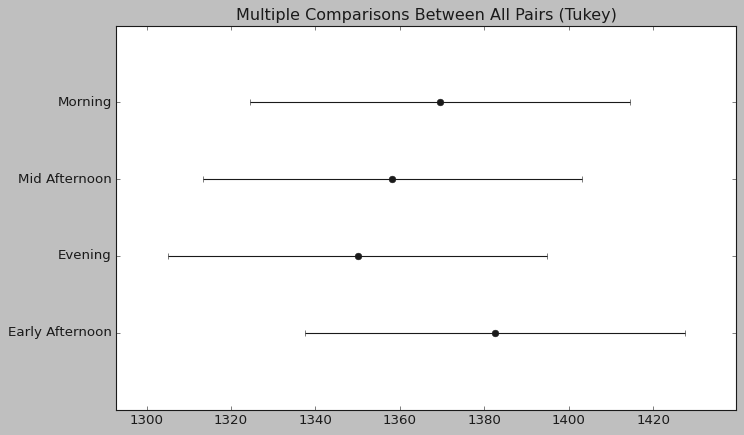

In [111]:
##Tukey's HSD Function Already imported above
tukey_results = pairwise_tukeyhsd(ol_learning['Engagement'], ol_learning['Section'], alpha=0.05)
tukey_results.plot_simultaneous()
print(tukey_results)

# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 20, 2026**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective is to compare the effectiveness of online teaching methods.

**Question 2.** Specify the outcome variable

The outcome variables is the percentage of a Question quiz on hyposthesis testing.

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

The independent variables are three types of teaching methods, collaborative, direct instruction and inquiry based learning. Blocking factor is prior knowledge (low/High) and the lurking variables are age,  academic acheivment and demographic factors.

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

Randomized block would distribute out the prior knowledge low and high evenly throughout the three types of teaching methods. A completly randomized design woiuld not distribute prior knowledge evenly and so you may not get an even balance and so some results maybe skewed and we would not get a fair comparision.  

**Question 5.** State the null and alternative hypotheses for this experiment.

H0 my null would be the mean quiz scores would be equal across all three types of teaching methods.
H1 My alternative would be at least one would have a different score.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

The summary statistics and the data visualization support the alternative hypothesis.The boxplt shows the calliborative method has higher quiz scores but an Anova is necessary in order to determine if it is statitically significant.
    
**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

The points of the QQ PLOT all fall along the line with little deviation
The P Value assoc with Shapirpo Wilk Test of Normaility gives evidence for the Null hypothesis of normaility.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



Based on the Residual plot the points look randomly scattered around 0 and the spread looks pretty consistent. There are not any funnel shape nor pattern that would suggest non constant variance. The BP Test has a large p value is .97 so no evidence of heteroscedasticity in the model.

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

The F stastic of 8.809 shows that variabiltiy in quiz grades between teaching methods is much larger that the randon variability with in groups. There is a pvalue <.046 and since it is less than .05 we can reject the null hypothesis.


**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

The Anova results supported the alternative hypothesis, a tukey HSD post hoc test was performed to determine which teaching method differ. The Tukey results show that the collabroative and the Inquiry p = .0838 abd between Direct and inquiry is p = .1168 are not statistically significant showing the main difference in quiz performance is between collaborative and Direct Instruction.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.

The results suggest the teaching method does not have a meaningful impact of quiz performance. The ANOVA showed statitically significant differences among the group means and the Tukey HSD results indicate that students in Collaborative and Direct groups performed significantly different from either of the two methods.
There are a few limitations to keep in mind suchas the study did not include the students baseline knowledge. We also have to take account age, I feel that we changes the educational system so much that an older student will not have the same education as a younger student. I also know that not all classes work the same, and with randomized block design it assumed that every class is the same.
I feel that in order to get accurate results we truly need a baseline, so maybe taking a baseline prior to the lesson and after the lesson, I would even makesure that the instructor is the same because not all instructor teach the same.



**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objects is to determine if student engagement differs accoss the four online learning platforms.

**Question 2.** Specify the outcome variable

The DV is student engagment measured by the total number of logins to the online learning platforms.

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

The IV is the online learning platform(a through d) The blocking factors would be the Day of the week and time of the day
Some lurking variables would be student schedules, course difficulty, prior knowledge, employment status/family responsibilities and internet connection.

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

In this case the latin Square would be appropriate because it has one IV category but has two blocking factors. The Randomazied Block design  can only cover 1 blocking factor and a completely randomized design would not consider the effect of day and time.

**Question 5.** State the null and alternative hypotheses for this experiment.

H0 H Null will not differ across the 4 learning platforms
and the Alternative hypothesis states that at least one differs across the learning platform

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

Based on the summary statistic and the box plot the engagement levels accross the different platforms appear to be very similar. They don't contradict the null hypothesis but a ANOVA test would be needed to determine if any differences in Engagement is statistically significant.

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

A three away ANOVA model was fit using engagement, platform, day and section. To assess the normailty both a visual and statitical method were used. The Q_Q plot of the resduals showed the points following the reference line with no major deviations. The SW test produced a pvalue of .88 which is greater than 05. Because the p value is greater than the significance level we fail to reject the null hypothesis of normality.


**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

to check the assumption of homogeneity of variance I used both visual and a testist method. Visually I looked at the residuals vs fitted and the oints were randomly scattered ariund 0 with no funnels or patterns. For the B=P Test the p value was .49 which is greater than .05 we fail to reject the null hypothesis.


**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

The F statistic is 6.16 with an associated p value of .02. Since the p-value is less than .05 we reject the null hypothesis. This indicated that there is a large variability of engagement across the platforms. therefore the data supports the alternative hypothesis.


**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

Because the ANOVA results more strogly suppoprt the alternative hypothesis. A tukey was performed to see which platform differs from each other and based on the results there were no statitical significance at the .05 levels so all comparisons were rejected = false. This tells me that while the overal ANOVA test detects a difference somewhere in the platform, platform differences are not large enough to be detected.

**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.

the latin square analysis suggest that the online learning platform may have an effect on student engagement after controlling the day of the week and time of the day. ANOVA showed a statistically significant effect for platform f = 6.16 p = .02 meaning engagement is not the same accross all platforms at the same time Tukey post hoc did not show any pair that had a huge difference among the platforms. It looks that the study may not have enough power to pick out the exact difference.
A few limitaions first we are measuring total logins, which I beleive is not enough to capture engagement. I can have a student completely engaged in a game but that does not mean they will be motivated to log back on again or if they have an internet issue that causes you to log in several times, this can skwq my results. I can also add if I have a procractinator I can have one log on for a very long period of time. If I had to do this study again in the future I would include how long the students are on each module, one course, I would test new students or students who have used online platforms before and if there is a way to measure activity while there in a module that would probably be better than time because someone can walk away from their computer.